# **[FER](https://towardsdatascience.com/the-ultimate-guide-to-emotion-recognition-from-facial-expressions-using-python-64e58d4324ff)**

In [1]:
# We install the FER() library to perform facial recognition
# This installation will also take care of any of the above dependencies if they are missing
# !pip install FER 


In [1]:
from fer import FER

In [2]:

import matplotlib.pyplot as plt 
%matplotlib inline

In [5]:
path= 'image.jpeg'

In [6]:


test_image_one = plt.imread(path)
emo_detector = FER(mtcnn=True)


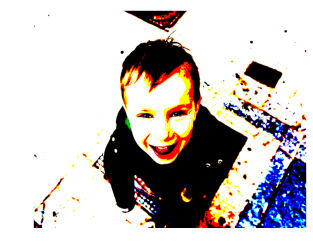

In [18]:
plt.imshow(test_image_one)
plt.show()

In [19]:
test_image_one.shape

(637, 800, 3)

In [20]:
test_image_one[:1]

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)

In [12]:
import numpy as np

In [14]:
test_image_one= np.round(test_image_one, decimals=0)

In [16]:
test_image_one[:1]

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)

In [15]:
emo_detector.detect_emotions(test_image_one)

1/1 [==============================] - 0s 41ms/step


[]

In [22]:
# Capture all the emotions on the image
captured_emotions = emo_detector.detect_emotions(test_image_one)



1/1 [==============================] - 0s 34ms/step


In [23]:
captured_emotions

[{'box': [583, 69, 209, 262],
  'emotions': {'angry': 0.02,
   'disgust': 0.0,
   'fear': 0.03,
   'happy': 0.06,
   'sad': 0.11,
   'surprise': 0.0,
   'neutral': 0.78}}]

1/1 [==============================] - 0s 54ms/step
neutral 0.78


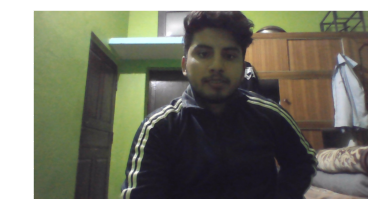

In [24]:
# Print all captured emotions with the image
# print(captured_emotions)
plt.imshow(test_image_one)


# Use the top Emotion() function to call for the dominant emotion in the image
dominant_emotion, emotion_score = emo_detector.top_emotion(test_image_one)
print(dominant_emotion, emotion_score)

# using opencv

In [25]:
import cv2
img = cv2.imread(path, cv2.IMREAD_COLOR)
cv2.imshow("me", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [26]:
import cv2
from fer import FER
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
emotion_detector = FER(mtcnn=True)


In [31]:

input_image= cv2.imread(path)
input_image= cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)



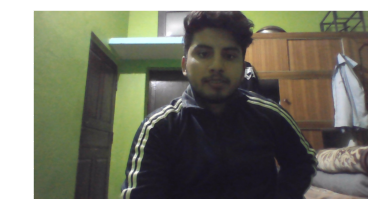

In [32]:
plt.imshow(input_image)
plt.show()

In [33]:
type(input_image)

numpy.ndarray

In [34]:
input_image.shape

(720, 1280, 3)

In [35]:
emotion_detector.detect_emotions(input_image)

1/1 [==============================] - 0s 225ms/step


[{'box': [583, 69, 209, 262],
  'emotions': {'angry': 0.02,
   'disgust': 0.0,
   'fear': 0.03,
   'happy': 0.06,
   'sad': 0.11,
   'surprise': 0.0,
   'neutral': 0.78}}]

In [36]:
# Save output in result variable
result = emotion_detector.detect_emotions(input_image)


1/1 [==============================] - 0s 36ms/step


In [37]:
result

[{'box': [583, 69, 209, 262],
  'emotions': {'angry': 0.02,
   'disgust': 0.0,
   'fear': 0.03,
   'happy': 0.06,
   'sad': 0.11,
   'surprise': 0.0,
   'neutral': 0.78}}]

In [38]:
bounding_box = result[0]["box"]
emotions = result[0]["emotions"]
cv2.rectangle(input_image,(
bounding_box[0], bounding_box[1]),(
bounding_box[0] + bounding_box[2], bounding_box[1] + bounding_box[3]),
			(0, 155, 255), 2,)


array([[[160, 170, 120],
        [160, 170, 120],
        [161, 169, 120],
        ...,
        [118, 127,  84],
        [118, 127,  84],
        [118, 127,  84]],

       [[159, 169, 119],
        [159, 169, 119],
        [160, 168, 119],
        ...,
        [119, 128,  85],
        [119, 128,  85],
        [119, 128,  85]],

       [[158, 167, 120],
        [158, 167, 120],
        [159, 167, 118],
        ...,
        [118, 129,  87],
        [118, 129,  87],
        [118, 129,  87]],

       ...,

       [[ 88,  92,  69],
        [ 88,  92,  69],
        [ 87,  92,  69],
        ...,
        [101,  96, 100],
        [100,  95,  99],
        [100,  95,  99]],

       [[ 89,  93,  70],
        [ 89,  93,  70],
        [ 87,  92,  69],
        ...,
        [107, 101, 105],
        [106, 100, 104],
        [106, 100, 104]],

       [[ 89,  93,  70],
        [ 89,  93,  70],
        [ 88,  93,  70],
        ...,
        [107, 101, 105],
        [105,  99, 103],
        [105,  99, 103]]

In [43]:
emotion_name, score = emotion_detector.top_emotion(input_image )
for index, (emotion_name, score) in enumerate(emotions.items()):
    color = (211, 211,211) if score < 0.01 else (255, 0, 0)
emotion_score = "{}: {}".format(emotion_name, "{:.2f}".format(score))

cv2.putText(input_image,emotion_score,
			(bounding_box[0], bounding_box[1] + bounding_box[3] + 30 + index * 15),
			cv2.FONT_HERSHEY_SIMPLEX,0.5,color,1,cv2.LINE_AA,)

#Save the result in new image file
input_image= cv2.cvtColor(input_image, cv2.COLOR_RGB2BGR)
cv2.imwrite("emotion.jpg", input_image)


1/1 [==============================] - 0s 37ms/step


True

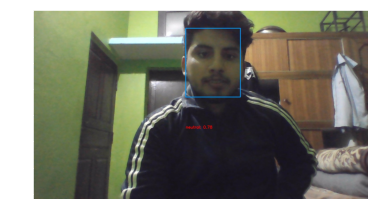

In [44]:
# Read image file using matplotlib's image module
result_image = mpimg.imread('emotion.jpg')
imgplot = plt.imshow(result_image)
# Display Output Image
plt.show()


## Video --- not working


In [46]:
path= 'C:\Deepankar/05_Semester\Project\Hackathon\Mood Detection\inputs/vid.mp4'

In [47]:
from fer import Video
from fer import FER
import os
import sys
import pandas as pd

# Put in the location of the video file that has to be processed
location_videofile = path

# Build the Face detection detector
emo_detector = FER(mtcnn=True)
# Input the video for processing
input_video = Video(location_videofile)


In [51]:
(input_video)

In [52]:
from fer import FER

In [53]:
input_video.analyze(emo_detector)

INFO:fer:7.60 fps, 62 frames, 8.16 seconds
INFO:fer:Making directories at output
  0%|          | 0/62 [00:00<?, ?frames/s]

1/1 [==============================] - 0s 170ms/step


  2%|▏         | 1/62 [00:01<01:06,  1.09s/frames]

1/1 [==============================] - 0s 104ms/step


  3%|▎         | 2/62 [00:01<00:56,  1.07frames/s]

1/1 [==============================] - 0s 106ms/step


  5%|▍         | 3/62 [00:02<00:52,  1.13frames/s]

1/1 [==============================] - 0s 101ms/step


  6%|▋         | 4/62 [00:03<00:50,  1.14frames/s]

1/1 [==============================] - 0s 19ms/step


  8%|▊         | 5/62 [00:04<00:47,  1.19frames/s]

1/1 [==============================] - 0s 102ms/step


 10%|▉         | 6/62 [00:05<00:47,  1.17frames/s]

1/1 [==============================] - 0s 98ms/step


 11%|█▏        | 7/62 [00:06<00:47,  1.17frames/s]

1/1 [==============================] - 0s 18ms/step


 13%|█▎        | 8/62 [00:06<00:44,  1.23frames/s]

1/1 [==============================] - 0s 101ms/step


 15%|█▍        | 9/62 [00:07<00:43,  1.23frames/s]

1/1 [==============================] - 0s 17ms/step


 16%|█▌        | 10/62 [00:08<00:41,  1.26frames/s]

1/1 [==============================] - 0s 105ms/step


 18%|█▊        | 11/62 [00:09<00:42,  1.21frames/s]

1/1 [==============================] - 0s 24ms/step


 19%|█▉        | 12/62 [00:10<00:41,  1.22frames/s]

1/1 [==============================] - 0s 99ms/step


 21%|██        | 13/62 [00:10<00:40,  1.21frames/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 14/62 [00:11<00:39,  1.22frames/s]

1/1 [==============================] - 0s 18ms/step


 24%|██▍       | 15/62 [00:12<00:36,  1.28frames/s]

1/1 [==============================] - 0s 17ms/step


 26%|██▌       | 16/62 [00:13<00:34,  1.33frames/s]

1/1 [==============================] - 0s 109ms/step


 27%|██▋       | 17/62 [00:14<00:35,  1.27frames/s]

1/1 [==============================] - 0s 17ms/step


 29%|██▉       | 18/62 [00:14<00:34,  1.29frames/s]

1/1 [==============================] - 0s 102ms/step


 31%|███       | 19/62 [00:15<00:33,  1.29frames/s]

1/1 [==============================] - 0s 119ms/step


 32%|███▏      | 20/62 [00:16<00:33,  1.26frames/s]

1/1 [==============================] - 0s 20ms/step


 34%|███▍      | 21/62 [00:17<00:32,  1.26frames/s]

1/1 [==============================] - 0s 18ms/step


 35%|███▌      | 22/62 [00:17<00:30,  1.31frames/s]

1/1 [==============================] - 0s 19ms/step


 37%|███▋      | 23/62 [00:18<00:28,  1.35frames/s]

1/1 [==============================] - 0s 23ms/step


 39%|███▊      | 24/62 [00:19<00:27,  1.37frames/s]

1/1 [==============================] - 0s 16ms/step


 40%|████      | 25/62 [00:19<00:26,  1.38frames/s]

1/1 [==============================] - 0s 18ms/step


 42%|████▏     | 26/62 [00:20<00:26,  1.38frames/s]

1/1 [==============================] - 0s 19ms/step


 44%|████▎     | 27/62 [00:21<00:25,  1.39frames/s]

1/1 [==============================] - 0s 17ms/step


 45%|████▌     | 28/62 [00:22<00:24,  1.39frames/s]

1/1 [==============================] - 0s 17ms/step


 47%|████▋     | 29/62 [00:22<00:23,  1.40frames/s]

1/1 [==============================] - 0s 17ms/step


 48%|████▊     | 30/62 [00:23<00:22,  1.40frames/s]

1/1 [==============================] - 0s 19ms/step


 50%|█████     | 31/62 [00:24<00:22,  1.40frames/s]

1/1 [==============================] - 0s 18ms/step


 52%|█████▏    | 32/62 [00:24<00:21,  1.41frames/s]

1/1 [==============================] - 0s 21ms/step


 53%|█████▎    | 33/62 [00:25<00:20,  1.41frames/s]

1/1 [==============================] - 0s 19ms/step


 55%|█████▍    | 34/62 [00:26<00:20,  1.39frames/s]

1/1 [==============================] - 0s 20ms/step


 56%|█████▋    | 35/62 [00:27<00:19,  1.38frames/s]

1/1 [==============================] - 0s 106ms/step


 58%|█████▊    | 36/62 [00:27<00:19,  1.34frames/s]

1/1 [==============================] - 0s 17ms/step


 60%|█████▉    | 37/62 [00:28<00:18,  1.37frames/s]

1/1 [==============================] - 0s 15ms/step


 61%|██████▏   | 38/62 [00:29<00:17,  1.40frames/s]

1/1 [==============================] - 0s 17ms/step


 63%|██████▎   | 39/62 [00:29<00:16,  1.42frames/s]

1/1 [==============================] - 0s 21ms/step


 65%|██████▍   | 40/62 [00:30<00:15,  1.40frames/s]

1/1 [==============================] - 0s 16ms/step


 66%|██████▌   | 41/62 [00:31<00:14,  1.41frames/s]

1/1 [==============================] - 0s 17ms/step


 68%|██████▊   | 42/62 [00:32<00:14,  1.43frames/s]

1/1 [==============================] - 0s 16ms/step


 69%|██████▉   | 43/62 [00:32<00:13,  1.42frames/s]

1/1 [==============================] - 0s 15ms/step


 71%|███████   | 44/62 [00:33<00:12,  1.42frames/s]

1/1 [==============================] - 0s 16ms/step


 73%|███████▎  | 45/62 [00:34<00:11,  1.42frames/s]

1/1 [==============================] - 0s 17ms/step


 74%|███████▍  | 46/62 [00:34<00:11,  1.43frames/s]

1/1 [==============================] - 0s 217ms/step


 76%|███████▌  | 47/62 [00:35<00:11,  1.30frames/s]

1/1 [==============================] - 0s 99ms/step


 77%|███████▋  | 48/62 [00:36<00:10,  1.28frames/s]

1/1 [==============================] - 0s 99ms/step


 79%|███████▉  | 49/62 [00:37<00:10,  1.28frames/s]

1/1 [==============================] - 0s 15ms/step


 81%|████████  | 50/62 [00:38<00:08,  1.33frames/s]

1/1 [==============================] - 0s 97ms/step


 82%|████████▏ | 51/62 [00:38<00:08,  1.32frames/s]

1/1 [==============================] - 0s 16ms/step


 84%|████████▍ | 52/62 [00:39<00:07,  1.33frames/s]

1/1 [==============================] - 0s 18ms/step


 85%|████████▌ | 53/62 [00:40<00:06,  1.35frames/s]

1/1 [==============================] - 0s 16ms/step


 87%|████████▋ | 54/62 [00:41<00:05,  1.37frames/s]

1/1 [==============================] - 0s 17ms/step


 89%|████████▊ | 55/62 [00:41<00:05,  1.38frames/s]

1/1 [==============================] - 0s 18ms/step


 90%|█████████ | 56/62 [00:42<00:04,  1.38frames/s]

1/1 [==============================] - 0s 17ms/step


 92%|█████████▏| 57/62 [00:43<00:03,  1.39frames/s]

1/1 [==============================] - 0s 17ms/step


 94%|█████████▎| 58/62 [00:43<00:02,  1.40frames/s]

1/1 [==============================] - 0s 21ms/step


 95%|█████████▌| 59/62 [00:44<00:02,  1.42frames/s]

1/1 [==============================] - 0s 138ms/step


 97%|█████████▋| 60/62 [00:45<00:01,  1.30frames/s]

1/1 [==============================] - 0s 97ms/step


 98%|█████████▊| 61/62 [00:46<00:00,  1.30frames/s]

2/2 [==============================] - 0s 86ms/step


100%|██████████| 62/62 [00:47<00:00,  1.32frames/s]
INFO:fer:Completed analysis: saved to output\vid_output.mp4
INFO:fer:Starting to Zip
INFO:fer:Compressing: 80%
INFO:fer:Zip has finished


IndexError: list index out of range

In [ ]:

# The Analyze() function will run analysis on every frame of the input video. 
# It will create a rectangular box around every image and show the emotion values next to that.
# Finally, the method will publish a new video that will have a box around the face of the human with live emotion values.
processing_data = input_video.analyze(face_detector, display=False)


INFO:fer:7.60 fps, 62 frames, 8.16 seconds
INFO:fer:Making directories at output
  0%|          | 0/62 [00:00<?, ?frames/s]

1/1 [==============================] - 0s 90ms/step


  2%|▏         | 1/62 [00:00<00:51,  1.19frames/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 2/62 [00:01<00:46,  1.30frames/s]

1/1 [==============================] - 0s 20ms/step


  5%|▍         | 3/62 [00:02<00:44,  1.33frames/s]

1/1 [==============================] - 0s 18ms/step


  6%|▋         | 4/62 [00:03<00:44,  1.29frames/s]

1/1 [==============================] - 0s 25ms/step


  8%|▊         | 5/62 [00:03<00:45,  1.26frames/s]

1/1 [==============================] - 0s 19ms/step


 10%|▉         | 6/62 [00:04<00:44,  1.26frames/s]

1/1 [==============================] - 0s 20ms/step


 11%|█▏        | 7/62 [00:05<00:43,  1.25frames/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 8/62 [00:06<00:43,  1.24frames/s]

1/1 [==============================] - 0s 19ms/step


 15%|█▍        | 9/62 [00:07<00:41,  1.27frames/s]

1/1 [==============================] - 0s 21ms/step


 16%|█▌        | 10/62 [00:07<00:40,  1.28frames/s]

1/1 [==============================] - 0s 20ms/step


 18%|█▊        | 11/62 [00:08<00:40,  1.26frames/s]

1/1 [==============================] - 0s 16ms/step


 19%|█▉        | 12/62 [00:09<00:38,  1.28frames/s]

1/1 [==============================] - 0s 18ms/step


 21%|██        | 13/62 [00:10<00:37,  1.29frames/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 14/62 [00:10<00:37,  1.30frames/s]

1/1 [==============================] - 0s 17ms/step


 24%|██▍       | 15/62 [00:11<00:36,  1.30frames/s]

1/1 [==============================] - 0s 17ms/step


 26%|██▌       | 16/62 [00:12<00:34,  1.32frames/s]

1/1 [==============================] - 0s 19ms/step


 27%|██▋       | 17/62 [00:13<00:33,  1.34frames/s]

1/1 [==============================] - 0s 18ms/step


 29%|██▉       | 18/62 [00:13<00:32,  1.35frames/s]

1/1 [==============================] - 0s 19ms/step


 31%|███       | 19/62 [00:14<00:31,  1.36frames/s]

1/1 [==============================] - 0s 17ms/step


 32%|███▏      | 20/62 [00:15<00:30,  1.38frames/s]

1/1 [==============================] - 0s 18ms/step


 34%|███▍      | 21/62 [00:16<00:29,  1.37frames/s]

1/1 [==============================] - 0s 17ms/step


 35%|███▌      | 22/62 [00:16<00:28,  1.38frames/s]

1/1 [==============================] - 0s 21ms/step


 37%|███▋      | 23/62 [00:17<00:28,  1.37frames/s]

1/1 [==============================] - 0s 20ms/step


 39%|███▊      | 24/62 [00:18<00:28,  1.33frames/s]

1/1 [==============================] - 0s 24ms/step


 40%|████      | 25/62 [00:19<00:28,  1.30frames/s]

1/1 [==============================] - 0s 18ms/step


 42%|████▏     | 26/62 [00:19<00:27,  1.29frames/s]

1/1 [==============================] - 0s 21ms/step


 44%|████▎     | 27/62 [00:20<00:27,  1.29frames/s]

1/1 [==============================] - 0s 22ms/step


 45%|████▌     | 28/62 [00:21<00:26,  1.27frames/s]

1/1 [==============================] - 0s 19ms/step


 47%|████▋     | 29/62 [00:22<00:25,  1.29frames/s]

1/1 [==============================] - 0s 16ms/step


 48%|████▊     | 30/62 [00:22<00:24,  1.32frames/s]

1/1 [==============================] - 0s 18ms/step


 50%|█████     | 31/62 [00:23<00:23,  1.33frames/s]

1/1 [==============================] - 0s 20ms/step


 52%|█████▏    | 32/62 [00:24<00:22,  1.34frames/s]

1/1 [==============================] - 0s 18ms/step


 53%|█████▎    | 33/62 [00:25<00:21,  1.36frames/s]

1/1 [==============================] - 0s 18ms/step


 55%|█████▍    | 34/62 [00:25<00:20,  1.36frames/s]

1/1 [==============================] - 0s 20ms/step


 56%|█████▋    | 35/62 [00:26<00:19,  1.37frames/s]

1/1 [==============================] - 0s 20ms/step


 58%|█████▊    | 36/62 [00:27<00:19,  1.37frames/s]

1/1 [==============================] - 0s 17ms/step


 60%|█████▉    | 37/62 [00:28<00:18,  1.36frames/s]

1/1 [==============================] - 0s 18ms/step


 61%|██████▏   | 38/62 [00:28<00:17,  1.36frames/s]

1/1 [==============================] - 0s 19ms/step


 63%|██████▎   | 39/62 [00:29<00:16,  1.38frames/s]

1/1 [==============================] - 0s 17ms/step


 65%|██████▍   | 40/62 [00:30<00:16,  1.37frames/s]

1/1 [==============================] - 0s 18ms/step


 66%|██████▌   | 41/62 [00:30<00:15,  1.37frames/s]

1/1 [==============================] - 0s 19ms/step


 68%|██████▊   | 42/62 [00:31<00:14,  1.36frames/s]

1/1 [==============================] - 0s 17ms/step


 69%|██████▉   | 43/62 [00:32<00:13,  1.37frames/s]

1/1 [==============================] - 0s 17ms/step


 71%|███████   | 44/62 [00:33<00:13,  1.37frames/s]

1/1 [==============================] - 0s 16ms/step


 73%|███████▎  | 45/62 [00:33<00:12,  1.37frames/s]

1/1 [==============================] - 0s 16ms/step


 74%|███████▍  | 46/62 [00:34<00:11,  1.38frames/s]

1/1 [==============================] - 0s 96ms/step


 76%|███████▌  | 47/62 [00:35<00:11,  1.28frames/s]

1/1 [==============================] - 0s 20ms/step


 77%|███████▋  | 48/62 [00:36<00:10,  1.30frames/s]

1/1 [==============================] - 0s 16ms/step


 79%|███████▉  | 49/62 [00:36<00:09,  1.32frames/s]

1/1 [==============================] - 0s 19ms/step


 81%|████████  | 50/62 [00:37<00:08,  1.34frames/s]

1/1 [==============================] - 0s 20ms/step


 82%|████████▏ | 51/62 [00:38<00:08,  1.34frames/s]

1/1 [==============================] - 0s 21ms/step


 84%|████████▍ | 52/62 [00:39<00:07,  1.34frames/s]

1/1 [==============================] - 0s 19ms/step


 85%|████████▌ | 53/62 [00:40<00:06,  1.30frames/s]

1/1 [==============================] - 0s 20ms/step


 87%|████████▋ | 54/62 [00:40<00:06,  1.28frames/s]

1/1 [==============================] - 0s 29ms/step


 89%|████████▊ | 55/62 [00:41<00:05,  1.26frames/s]

1/1 [==============================] - 0s 18ms/step


 90%|█████████ | 56/62 [00:42<00:04,  1.26frames/s]

1/1 [==============================] - 0s 21ms/step


 92%|█████████▏| 57/62 [00:43<00:04,  1.25frames/s]

1/1 [==============================] - 0s 18ms/step


 94%|█████████▎| 58/62 [00:44<00:03,  1.25frames/s]

1/1 [==============================] - 0s 19ms/step


 95%|█████████▌| 59/62 [00:44<00:02,  1.27frames/s]

1/1 [==============================] - 0s 18ms/step


 97%|█████████▋| 60/62 [00:45<00:01,  1.25frames/s]

1/1 [==============================] - 0s 17ms/step


 98%|█████████▊| 61/62 [00:46<00:00,  1.29frames/s]

2/2 [==============================] - 0s 6ms/step


100%|██████████| 62/62 [00:47<00:00,  1.32frames/s]
INFO:fer:Completed analysis: saved to output\vid_output.mp4
INFO:fer:Starting to Zip
INFO:fer:Compressing: 80%
INFO:fer:Zip has finished


IndexError: list index out of range

In [ ]:

# We will now convert the analysed information into a dataframe.
# This will help us import the data as a .CSV file to perform analysis over it later
vid_df = input_video.to_pandas(processing_data)
vid_df = input_video.get_first_face(vid_df)
vid_df = input_video.get_emotions(vid_df)

# Plotting the emotions against time in the video
pltfig = vid_df.plot(figsize=(20, 8), fontsize=16).get_figure()

# We will now work on the dataframe to extract which emotion was prominent in the video
angry = sum(vid_df.angry)
disgust = sum(vid_df.disgust)
fear = sum(vid_df.fear)
happy = sum(vid_df.happy)
sad = sum(vid_df.sad)
surprise = sum(vid_df.surprise)
neutral = sum(vid_df.neutral)

emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
emotions_values = [angry, disgust, fear, happy, sad, surprise, neutral]

score_comparisons = pd.DataFrame(emotions, columns = ['Human Emotions'])
score_comparisons['Emotion Value from the Video'] = emotions_values

In [ ]:
score_comparisons[:10]